<a href="https://colab.research.google.com/github/lilasu086/Coding-Project/blob/main/MachineLearning_K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab code: https://colab.research.google.com/drive/1ZnrOjylIu7VdJaDP-LPR0PflXgAPisFW?usp=sharing

**Group: 13**

**Name: Annie Chien, Chih-Hsin Peng, Pei-Hsin Yang, Yu Chun Su**

**Problem Description**

The Gilt marketing team is planning to test a money-off discount promotion this holiday season to drive incremental sales. They would like to maximize the impact of the discount offer by being thoughtful about who gets a specific offer. Offer options are 10 off, 20 off, 30 off a single purchase during the promotional period.


**Variable Description**

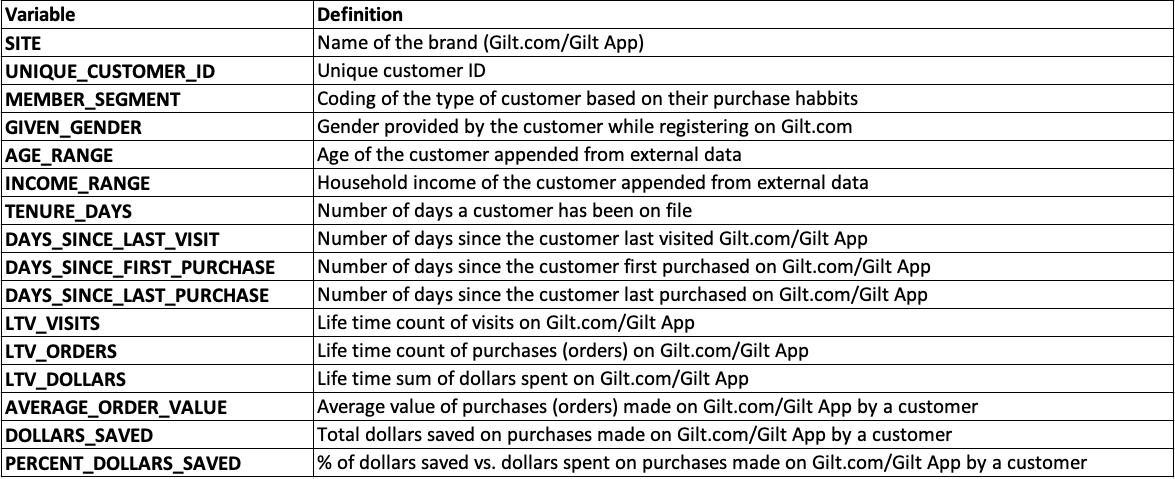

In [ ]:
# import dataset
import pandas as pd
df= pd.read_excel("/content/BU_Clustering_Dataset_Final.xlsx",sheet_name='Raw Data')
df

,SITE,UNIQUE_CUSTOMER_ID,MEMBER_SEGMENT,GIVEN_GENDER,AGE_RANGE,INCOME_RANGE,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_FIRST_PURCHASE,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE,DOLLARS_SAVED,PERCENT_DOLLARS_SAVED
0,Gilt,78878158,B-BARGAINSHOPPER,M,35 - 44,$40 - $49 K,1242,67,1242,93,77,5,569.94,113.99,1906.06,0.7698
1,Gilt,55676506,B-BUYER,F,55 - 64,$40 - $49 K,4238,0,3139,102,544,10,760.94,84.55,875.05,0.5349
2,Gilt,31872504,B-BUYER,F,35 - 44,$50 - $74 K,5133,1,4305,28,400,124,17746.87,155.67,24298.09,0.5779
3,Gilt,27382129,B-BUYER,F,55 - 64,$125+ K,4300,248,248,248,6,1,52.00,52.00,246.00,0.8255
4,Gilt,92301629,B-BUYER,F,55 - 64,$20 - $29 K,58,3,54,3,32,13,2899.91,223.07,5027.33,0.6342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Gilt,35615191,B-BUYER,M,55 - 64,$50 - $74 K,5489,109,5488,109,39,23,2883.99,125.39,3637.81,0.5578
996,Gilt,89291793,B-BUYER,M,45 - 54,$15 - $19 K,466,4,461,19,91,3,635.88,211.96,655.87,0.5077
997,Gilt,26543266,B-BIGSPENDER,F,35 - 44,$75 - $99 K,2810,2,2146,59,657,9,4342.93,482.55,3787.07,0.4658
998,Gilt,89715905,B-BUYER,F,35 - 44,$20 - $29 K,418,324,324,324,2,1,34.00,34.00,125.99,0.7875


In [ ]:
df.isnull().sum()
# result: there's no Null value to solve / drop

SITE                         0
UNIQUE_CUSTOMER_ID           0
MEMBER_SEGMENT               0
GIVEN_GENDER                 0
AGE_RANGE                    0
INCOME_RANGE                 0
TENURE_DAYS                  0
DAYS_SINCE_LAST_VISIT        0
DAYS_SINCE_FIRST_PURCHASE    0
DAYS_SINCE_LAST_PURCHASE     0
LTV_VISITS                   0
LTV_ORDERS                   0
LTV_DOLLARS                  0
AVERAGE_ORDER_VALUE          0
DOLLARS_SAVED                0
PERCENT_DOLLARS_SAVED        0
dtype: int64

In [ ]:
# drop the non-use columns: 'SITE','UNIQUE_CUSTOMER_ID'
df = df.drop(['SITE','UNIQUE_CUSTOMER_ID'], axis=1)
df

,MEMBER_SEGMENT,GIVEN_GENDER,AGE_RANGE,INCOME_RANGE,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_FIRST_PURCHASE,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE,DOLLARS_SAVED,PERCENT_DOLLARS_SAVED
0,B-BARGAINSHOPPER,M,35 - 44,$40 - $49 K,1242,67,1242,93,77,5,569.94,113.99,1906.06,0.7698
1,B-BUYER,F,55 - 64,$40 - $49 K,4238,0,3139,102,544,10,760.94,84.55,875.05,0.5349
2,B-BUYER,F,35 - 44,$50 - $74 K,5133,1,4305,28,400,124,17746.87,155.67,24298.09,0.5779
3,B-BUYER,F,55 - 64,$125+ K,4300,248,248,248,6,1,52.00,52.00,246.00,0.8255
4,B-BUYER,F,55 - 64,$20 - $29 K,58,3,54,3,32,13,2899.91,223.07,5027.33,0.6342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,B-BUYER,M,55 - 64,$50 - $74 K,5489,109,5488,109,39,23,2883.99,125.39,3637.81,0.5578
996,B-BUYER,M,45 - 54,$15 - $19 K,466,4,461,19,91,3,635.88,211.96,655.87,0.5077
997,B-BIGSPENDER,F,35 - 44,$75 - $99 K,2810,2,2146,59,657,9,4342.93,482.55,3787.07,0.4658
998,B-BUYER,F,35 - 44,$20 - $29 K,418,324,324,324,2,1,34.00,34.00,125.99,0.7875


In [ ]:
# change textual categorical variables into numrical categorical variables: "MEMBER_SEGMENT","GIVEN_GENDER","AGE_RANGE","INCOME_RANGE"

# set(df["MEMBER_SEGMENT"])
# {'B-BARGAINSHOPPER', 'B-BIGSPENDER', 'B-BUYER', 'B-RETURNER'}

# set(df['GIVEN_GENDER'])
# {'F', 'M'}

# set(df['AGE_RANGE'])
# {'18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 - 74', '75 +'}

# set(df['INCOME_RANGE'])
# {'$100 - $124 K','$125+ K','$15 - $19 K','$20 - $29 K','$30 - $39 K','$40 - $49 K','$50 - $74 K','$75 - $99 K','Under $15 K'}

# define mapping: original values : desired values
mapping = {
    'B-BARGAINSHOPPER': 1,'B-BIGSPENDER': 2,'B-BUYER': 3,'B-RETURNER': 4,
    'F':1 , 'M':2,
    '18 - 24':1, '25 - 34':2, '35 - 44':3, '45 - 54':4, '55 - 64':5, '65 - 74':6, '75 +':7,
    '$100 - $124 K':1,'$125+ K':2,'$15 - $19 K':3,'$20 - $29 K':4,'$30 - $39 K':5,'$40 - $49 K':6,'$50 - $74 K':7,'$75 - $99 K':8,'Under $15 K':9
}


df['MEMBER_SEGMENT'] = df['MEMBER_SEGMENT'].replace(mapping)
df['GIVEN_GENDER'] = df['GIVEN_GENDER'].replace(mapping)
df['AGE_RANGE'] = df['AGE_RANGE'].replace(mapping)
df['INCOME_RANGE'] = df['INCOME_RANGE'].replace(mapping)

df

,MEMBER_SEGMENT,GIVEN_GENDER,AGE_RANGE,INCOME_RANGE,TENURE_DAYS,DAYS_SINCE_LAST_VISIT,DAYS_SINCE_FIRST_PURCHASE,DAYS_SINCE_LAST_PURCHASE,LTV_VISITS,LTV_ORDERS,LTV_DOLLARS,AVERAGE_ORDER_VALUE,DOLLARS_SAVED,PERCENT_DOLLARS_SAVED
0,1,2,3,6,1242,67,1242,93,77,5,569.94,113.99,1906.06,0.7698
1,3,1,5,6,4238,0,3139,102,544,10,760.94,84.55,875.05,0.5349
2,3,1,3,7,5133,1,4305,28,400,124,17746.87,155.67,24298.09,0.5779
3,3,1,5,2,4300,248,248,248,6,1,52.00,52.00,246.00,0.8255
4,3,1,5,4,58,3,54,3,32,13,2899.91,223.07,5027.33,0.6342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,2,5,7,5489,109,5488,109,39,23,2883.99,125.39,3637.81,0.5578
996,3,2,4,3,466,4,461,19,91,3,635.88,211.96,655.87,0.5077
997,2,1,3,8,2810,2,2146,59,657,9,4342.93,482.55,3787.07,0.4658
998,3,1,3,4,418,324,324,324,2,1,34.00,34.00,125.99,0.7875


**Q1, Using the sample data, suggest the optimal number of clusters using an elbow plot. - 1 point**

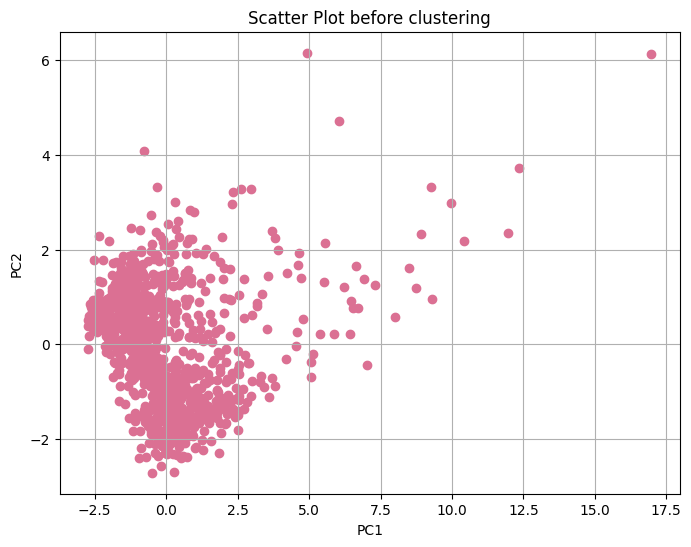

In [ ]:
# step 1: draw a scatterplot to show the original scatter condition

# 1-1 before drawing, standardize the data first, ensure that all features contribute equally to the modeling process and to prevent certain features dominate others due to differences in their original scale
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# 1-2 because there are too many features so need to use PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  #reduce the dimensionality of your data to two principal components (PC1 and PC2)
pca_result = pca.fit_transform(scaled_data)
pca_result
pca_result_dataframe = pd.DataFrame(pca_result, columns=['trait1','trait2']) # convert the pca_result from np.array to dataframe style and add column's name in it
pca_result_dataframe

plt.figure(figsize=(8, 6))
plt.scatter(pca_result_dataframe['trait1'], pca_result_dataframe['trait2'], c='palevioletred')
                                    # c:sets the color
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot before clustering')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

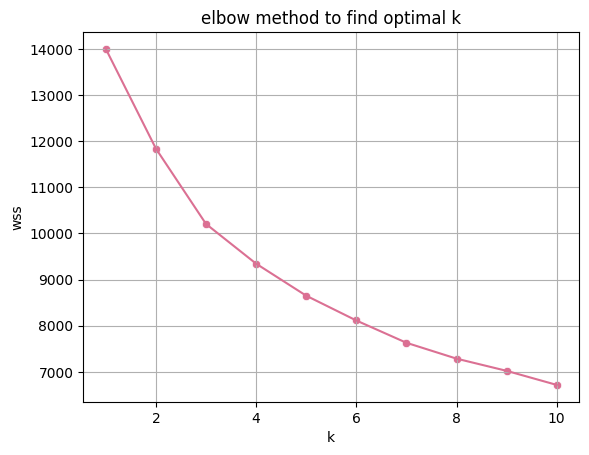

In [ ]:
# step 2. elbow method: find the optimal: k
from sklearn.cluster import KMeans
K = range(1, 11) # self-define: search the optimal K from 1~10
wss = [] # purpose to minimize the wss
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    wss_iter = kmeans.inertia_ # calculates the wss
    wss.append(wss_iter)
"""
Q: can I use pca_result when in elbow-method? or should I use scaled_data?
A: When using K-means clustering, it's typically better to perform the clustering on the scaled data rather than on the principal components obtained from PCA
"""

# 2-1. create dataframe to store the results: k and wss
result_df = pd.DataFrame({'cluster': K, 'wss': wss})

# 2-2. visualize the elbow-method
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
sns.scatterplot(x='cluster', y='wss', data=result_df, color='palevioletred', marker='o') # for dot
sns.lineplot(x='cluster', y='wss', data=result_df, color='palevioletred') # for line
plt.xlabel('k')
plt.ylabel('wss')
plt.title('elbow method to find optimal k')
plt.grid()
plt.show()

**Q2, Run a k-means clustering algorithm with k = 3 with this sample data. - 4 points**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


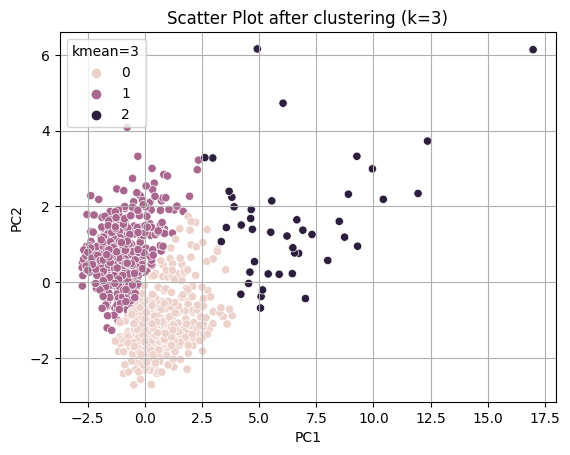

In [ ]:
# step 3. use the determined optimal k=3, plot the clustering
kmeans = KMeans(n_clusters=3,random_state=0) # estimator = KMeans()
kmeans.fit(pca_result) # prepare a training data

# add cluster result to the original dataset
df["kmean=3"] = kmeans.labels_
df

# visualization
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=df['kmean=3'])
plt.title('Scatter Plot after clustering (k=3)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()

**Q3, Describe each segment’s characteristics, i.e. proportion of male/female
customers, income buckets, average LTV dollars, Average Order Value, etc. How
similar and dissimilar are these clusters?- 3 points**

In [ ]:
# profiling
index_list = ['MEMBER_SEGMENT','GIVEN_GENDER','AGE_RANGE','INCOME_RANGE','TENURE_DAYS','DAYS_SINCE_LAST_VISIT','DAYS_SINCE_FIRST_PURCHASE',	'DAYS_SINCE_LAST_PURCHASE',	'LTV_VISITS',	'LTV_ORDERS',	'LTV_DOLLARS','AVERAGE_ORDER_VALUE','DOLLARS_SAVED'	,'PERCENT_DOLLARS_SAVED']

for i in index_list:
  cluster_statistics = df.groupby('kmean=3')[i].describe().reset_index()
 # cluster_statistics = cluster_statistics.rename(columns={'kmean=3':''})
  cluster_statistics = cluster_statistics.T
  cluster_statistics.drop(['count','kmean=3'],inplace=True)
  print("Statistics for","'",i,"'")
  print(cluster_statistics)
  print()

Statistics for ' MEMBER_SEGMENT '
             0         1         2
mean  2.880000  2.806026  2.363636
std   0.457846  0.512155  0.650256
min   1.000000  1.000000  1.000000
25%   3.000000  3.000000  2.000000
50%   3.000000  3.000000  2.000000
75%   3.000000  3.000000  3.000000
max   4.000000  4.000000  4.000000

Statistics for ' GIVEN_GENDER '
             0         1         2
mean  1.171765  1.165725  1.113636
std   0.377620  0.372184  0.321038
min   1.000000  1.000000  1.000000
25%   1.000000  1.000000  1.000000
50%   1.000000  1.000000  1.000000
75%   1.000000  1.000000  1.000000
max   2.000000  2.000000  2.000000

Statistics for ' AGE_RANGE '
             0         1         2
mean  3.872941  4.088512  4.159091
std   1.274883  1.370057  1.345849
min   1.000000  1.000000  2.000000
25%   3.000000  3.000000  3.000000
50%   4.000000  4.000000  4.000000
75%   5.000000  5.000000  5.000000
max   7.000000  7.000000  7.000000

Statistics for ' INCOME_RANGE '
             0         1      



These three clusters display similar demographic characteristics: they all have a high proportion of female customers, and their income levels and age ranges are comparable.

However, Cluster 2 boasts the highest average lifetime visits, orders, and expenditure, followed by Cluster 0, with Cluster 1 being the lowest. Therefore, we can infer that customers in Cluster 2 are the most loyal, visiting the website most frequently and spending the most money.

Cluster 1 has the shortest average duration since the first purchase and the shortest average tenure, indicating that these are relatively new customers. Additionally, Cluster 1 records the longest time since the last visit, suggesting that their loyalty to the website is the lowest.

Cluster 0 has similar tenure and time since the first purchase as Cluster 2, which could indicate a comparable level of initial engagement. Nevertheless, their average order value is the lowest, suggesting a challenge in encouraging these customers to spend more on the website. The similarity in the time since the last purchase between customers of Cluster 0 and Cluster 1(new customers) further reinforces this point.



**Q4, Would you recommend different promotional discount amounts for each
segment or the same for all? Justify your reasoning. - 1 point**

Our recommendation is to implement distinct discount strategies tailored to each customer segment. This decision is grounded in the noticeable variations observed across almost all variables within each group, indicating potential behavioral differences. Customizing promotional discounts for each segment is poised to attract a broader customer base, subsequently contributing to an overall increase in company profits.

For example, we propose a 10 discount for the most loyal customers (cluster 2), a 20 discount for the second most loyal customers (cluster 0), and a 30 discount for the least loyal customers (cluster 1). This strategy is underpinned by the understanding that the most loyal customers consistently exhibit a love for our products and a routine buying behavior. Even a $10 discount proves sufficient to maintain their loyalty. Conversely, the least loyal customers, lacking a habitual purchasing pattern, necessitate stronger incentives. Thus, offering them larger discounts acts as a compelling stimulus to encourage product purchases and, consequently, enhances profits derived from this specific customer segmentation.

With our diverse promotional discount approach for each segment, we not only retain our loyal customer base but also attract the least loyal ones. This results in improved Customer Stickiness and contributes to increased overall company gross profits.


**Q5, How would you test your campaign to ensure the segmentation helped? Hint:
Remember the Rue La La use case on creative testing shared in class. - 1 point**

We would use A/B testing to create different creative materials for each segment. By creating control groups for each segment that does and does not receive personalized materials, we will measure the performance of our campaign. Some examples of the materials are: the image content on EDMs, and different CTA buttons on emails.  

In addition, we can implement data tracking and analytics to monitor the results. By utilizing UTM tracking with Google Analytics, combined with other BI tools, we can pinpoint the campaign's impact our KPIs and ensure that the specific segment and campaign variations are effective.

In summary, A/B testing with personalized creative materials, control groups, and data tracking tools will allow us to evaluate and optimize campaign performance for different customer segments.